In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
gdp = pd.read_csv("../DATA/gross-domestic-product-march-2019-quarter-csv.csv")

In [3]:
gdp.head()

,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,SNEA.SG00NAC00B15,1972.03,6990.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Key aggregates, Nominal, Actual, Total",Gross Domestic Product - expenditure measure,NaN,NaN,NaN,NaN
1,SNEA.SG00NAC00B15,1973.03,8080.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Key aggregates, Nominal, Actual, Total",Gross Domestic Product - expenditure measure,NaN,NaN,NaN,NaN
2,SNEA.SG00NAC00B15,1974.03,9361.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Key aggregates, Nominal, Actual, Total",Gross Domestic Product - expenditure measure,NaN,NaN,NaN,NaN
3,SNEA.SG00NAC00B15,1975.03,10203.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Key aggregates, Nominal, Actual, Total",Gross Domestic Product - expenditure measure,NaN,NaN,NaN,NaN
4,SNEA.SG00NAC00B15,1976.03,11506.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Key aggregates, Nominal, Actual, Total",Gross Domestic Product - expenditure measure,NaN,NaN,NaN,NaN


In [4]:
gdp.Series_title_1.unique()

array(['Gross Domestic Product - expenditure measure',
       'Gross National Expenditure',
       'Gross Domestic Product - production measure',
       'Disposable Income - gross', 'Final Consumption Expenditure',
       'Gross Fixed Capital Formation', 'Changes in Inventories',
       'Exports of Goods', 'Imports of Goods', 'National Income - gross',
       'Trading Gain or Loss', 'Domestic Income - gross',
       'Investment Income, net', 'Current Transfers and Taxes, net',
       'Gross Capital Formation', 'Exports of Goods and Services',
       'Exports of Services', 'Imports of Goods and Services',
       'Imports of Services'], dtype=object)

In [5]:
gdp.STATUS.unique()

array(['FINAL', 'REVISED', 'CONFIDENTIAL', 'PROVISIONAL'], dtype=object)

In [6]:
gdp_measure = gdp[(gdp.Series_title_1 == "Gross Domestic Product - production measure") 
                  & (gdp.Series_title_2 == "Per Capita in New Zealand dollars")
                 & (gdp.STATUS == 'FINAL')]

In [7]:
gdp_measure.head()

,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
15044,SNEA.SG09NAC00B01NZ,1992.03,21670.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Per capita measure, Nominal, Actual, T...",Gross Domestic Product - production measure,Per Capita in New Zealand dollars,NaN,NaN,NaN
15045,SNEA.SG09NAC00B01NZ,1993.03,22115.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Per capita measure, Nominal, Actual, T...",Gross Domestic Product - production measure,Per Capita in New Zealand dollars,NaN,NaN,NaN
15046,SNEA.SG09NAC00B01NZ,1994.03,23590.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Per capita measure, Nominal, Actual, T...",Gross Domestic Product - production measure,Per Capita in New Zealand dollars,NaN,NaN,NaN
15047,SNEA.SG09NAC00B01NZ,1995.03,24928.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Per capita measure, Nominal, Actual, T...",Gross Domestic Product - production measure,Per Capita in New Zealand dollars,NaN,NaN,NaN
15048,SNEA.SG09NAC00B01NZ,1996.03,26076.0,FINAL,Dollars,6,National Accounts - SNA 2008 - SNE,"Series, Per capita measure, Nominal, Actual, T...",Gross Domestic Product - production measure,Per Capita in New Zealand dollars,NaN,NaN,NaN


In [8]:
gdp_measure.drop(columns=['Series_reference', 'STATUS', 'UNITS', 'MAGNTUDE', 
                          'Subject', 'Group', 'Series_title_1', 'Series_title_2',
                         'Series_title_3', 'Series_title_4', 'Series_title_5'], axis=1, inplace=True)

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
gdp_measure.head()

,Period,Data_value
15044,1992.03,21670.0
15045,1993.03,22115.0
15046,1994.03,23590.0
15047,1995.03,24928.0
15048,1996.03,26076.0


In [10]:
gdp_measure['date_col'] = gdp_measure['Period'].astype(str).str.split('.')
gdp_measure['year'] = [x[0] for x in gdp_measure['date_col']]
gdp_measure['year'] = pd.to_datetime(gdp_measure['year'])

/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/joshishushruth/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [11]:
gdp_measure.drop(columns=['Period', 'date_col'], axis=1, inplace=True)

In [12]:
gdp_final = pd.DataFrame(gdp_measure.groupby('year')['Data_value'].sum())

In [13]:
gdp_final.reset_index(inplace=True)

In [14]:
gdp_final.to_json("../JSON_DATA/gdp_production_per_year_per_capita.json", orient='table')

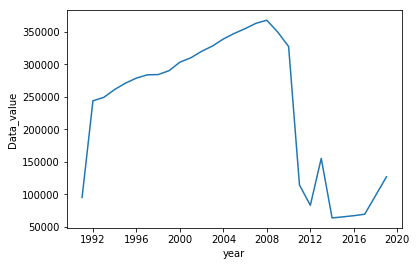

In [15]:
sns.lineplot(x='year', y="Data_value", data=gdp_final)